# K-Means Clustering Algorithm From Scratch

In [69]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [70]:
centroids = [(-5,-5),(5,5), (-2.5, 2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

In [71]:
X,y = make_blobs(n_samples=100, cluster_std= cluster_std, centers = centroids, n_features=2, random_state=2)

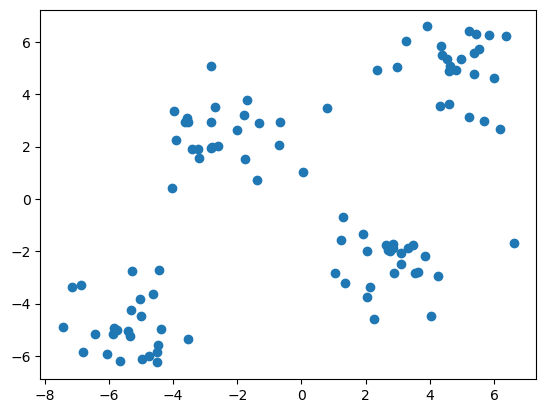

In [72]:
plt.scatter(X[:,0],X[:,1])

In [73]:
import random
import numpy as np

In [74]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]
        for i in range(self.max_iter):
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X,cluster_group)
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

            

In [75]:
km = KMeans(n_clusters=4, max_iter=100)
y_means = km.fit_predict(X)

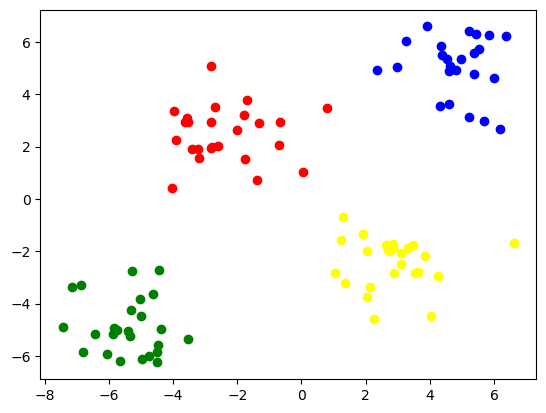

In [76]:
plt.scatter(X[y_means == 0,0], X[y_means ==0,1], color='red')
plt.scatter(X[y_means == 1,0], X[y_means ==1,1], color='blue')
plt.scatter(X[y_means == 2,0], X[y_means ==2,1], color='green')
plt.scatter(X[y_means == 3,0], X[y_means ==3,1], color='yellow')

### Using toy dataset

In [77]:
import pandas as pd
df = pd.read_csv('student_clustering.csv')

In [78]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [82]:
X = df.iloc[:,:].values

In [83]:
km = KMeans(n_clusters=4, max_iter=500)
y_means = km.fit_predict(X)

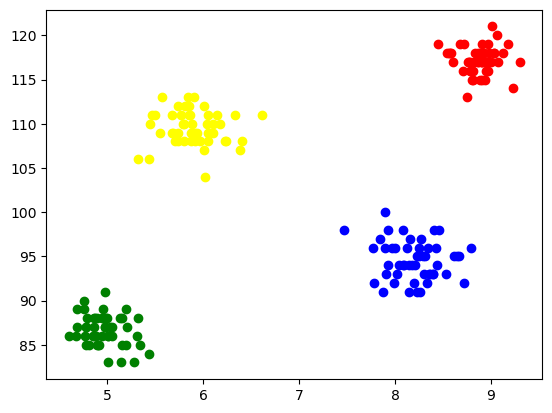

In [84]:
plt.scatter(X[y_means == 0,0], X[y_means ==0,1], color='red')
plt.scatter(X[y_means == 1,0], X[y_means ==1,1], color='blue')
plt.scatter(X[y_means == 2,0], X[y_means ==2,1], color='green')
plt.scatter(X[y_means == 3,0], X[y_means ==3,1], color='yellow')